<a href="https://colab.research.google.com/github/ash827/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Ashley_Eddings_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [77]:
import pandas as pd
breast_cancer_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
!curl 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'


30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1
34,60,1,1
34,61,10,1
34,67,7,1
34,60,0,1
35,64,13,1
35,63,0,1
36,60,1,1
36,69,0,1
37,60,0,1
37,63,0,1
37,58,0,1
37,59,6,1
37,60,15,1
37,63,0,1
38,69,21,2
38,59,2,1
38,60,0,1
38,60,0,1
38,62,3,1
38,64,1,1
38,66,0,1
38,66,11,1
38,60,1,1
38,67,5,1
39,66,0,2
39,63,0,1
39,67,0,1
39,58,0,1
39,59,2,1
39,63,4,1
40,58,2,1
40,58,0,1
40,65,0,1
41,60,23,2
41,64,0,2
41,67,0,2
41,58,0,1
41,59,8,1
41,59,0,1
41,64,0,1
41,69,8,1
41,65,0,1
41,65,0,1
42,69,1,2
42,59,0,2
42,58,0,1
42,60,1,1
42,59,2,1
42,61,4,1
42,62,20,1
42,65,0,1
42,63,1,1
43,58,52,2
43,59,2,2
43,64,0,2
43,64,0,2
43,63,14,1
43,64,2,1
43,64,3,1
43,60,0,1
43,63,2,1
43,65,0,1
43,66,4,1
44,64,6,2
44,58,9,2
44,63,19,2
44,61,0,1
44,63,1,1
44,61,0,1
44,67,16,1
45,65,6,2
45,66,0,2
45,67,1,2
45,60,0,1
45,67,0,1
45,59,14,1
45,64,0,1
45,68,0,1
45,67,1,1
46,58,2,2
46,69,3,2
46,62,5,2
46,65,20,2
46,62,0,1
46,58,3,1
46,63,0,1
47,63,23,2
47,62,0,2
47,6

In [0]:
breast_cancer_data = pd.read_csv(breast_cancer_data_url, header=None)

In [79]:
breast_cancer_data.shape # This returns 4, which is correct. Looking at the UCI website, it states 3, but there is, infact, 4. 

(306, 4)

In [80]:
breast_cancer_data.head(15)

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [81]:
breast_cancer_data.isna().sum() # No missing values here! Woohoo!

0    0
1    0
2    0
3    0
dtype: int64

In [82]:
col_headers = ['Age', 'Year_of_Op', 'Positive_Ax_Nodes', 'Survival_Status']

breast_cancer_data = pd.read_csv(breast_cancer_data_url, names=col_headers)
breast_cancer_data.head(15)  # I can't believe I'm doing this!! 

,Age,Year_of_Op,Positive_Ax_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [83]:
breast_cancer_data['Survival_Status'].value_counts() # Stuck on how to change the 2 to a 0! The 1 will stay the way it is

1    225
2     81
Name: Survival_Status, dtype: int64

In [84]:
breast_cancer_data['Survival_Status'].astype(str).str.replace('2', '0')
# I'm sorry, I just can't seem to get this one right. The only thing I can't seem to figure out
#breast_cancer_data['Survival_Status'].replace(to_replace = '2',
                                         # value = '0')
#breast_cancer_data['Survival_Status'] = breast_cancer_data['Survival_Status'].replace({'2': 0, '1': 1})

#breast_cancer_data.loc[breast_cancer_data['Survival_Status'] == 2] = 0
#breast_cancer_data.head(25)   This changed it all to 0 and translated poorly on the graphs

# I am saving all the code I used to get to this point! This was my biggest blocker

#breast_cancer_data['Survival_Status'].str.replace('2', '0').astype(0) 

#breast_cancer_data['Survival_Status'] = breast_cancer_data['Survival_Status'].str.contains('1', '0')
#breast_cancer_data['Survival_Status'].value_counts()
#breast_cancer_data['Survival_Status'] = breast_cancer_data['Survival_Status'].astype(int)
#Survival_Status = {'True': 0, 'False': 1}
#breast_cancer_data['Survival_Status'] = [breast_cancer_data['Survival_Status'][item] for item in breast_cancer_data['Survival_Status']] 

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: Survival_Status, Length: 306, dtype: object

In [86]:
breast_cancer_data.head()

,Age,Year_of_Op,Positive_Ax_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [87]:
breast_cancer_data['Survival_Status'].value_counts() # I can't seem to get this one right, I changed it above?

1    225
2     81
Name: Survival_Status, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [88]:
breast_cancer_data.head()

,Age,Year_of_Op,Positive_Ax_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


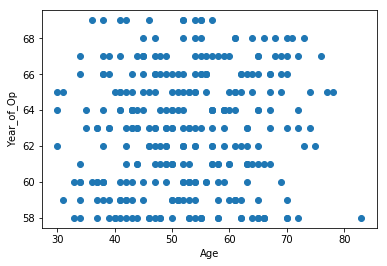

In [89]:
import matplotlib.pyplot as plt
plt.scatter(breast_cancer_data['Age'],breast_cancer_data['Year_of_Op'])
plt.xlabel('Age')
plt.ylabel('Year_of_Op') # This looks interesting!
plt.show()

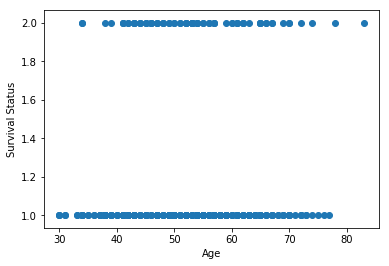

In [90]:
plt.scatter(breast_cancer_data['Age'],breast_cancer_data['Survival_Status'])
plt.xlabel('Age')
plt.ylabel('Survival Status') # This is harder to interpret
plt.show()

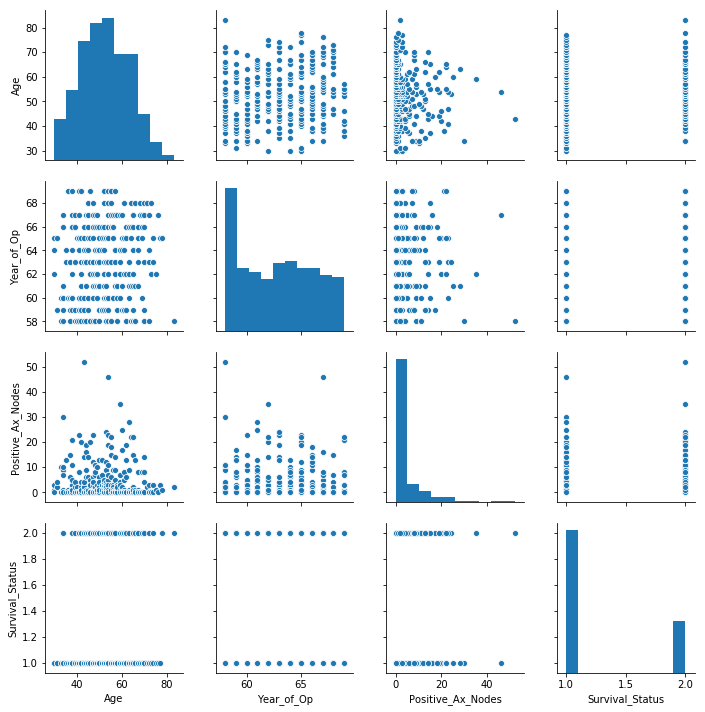

In [91]:
import seaborn as sns
sns.pairplot(breast_cancer_data);

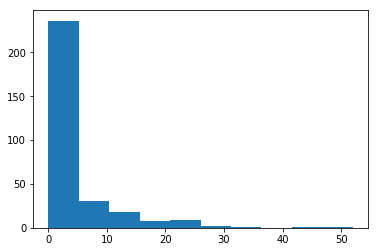

In [92]:
plt.hist(breast_cancer_data['Positive_Ax_Nodes']);

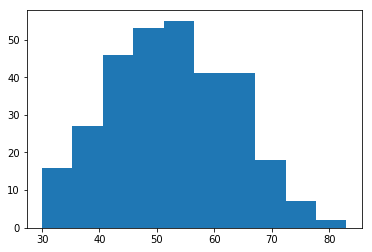

In [93]:
plt.hist(breast_cancer_data['Age']);

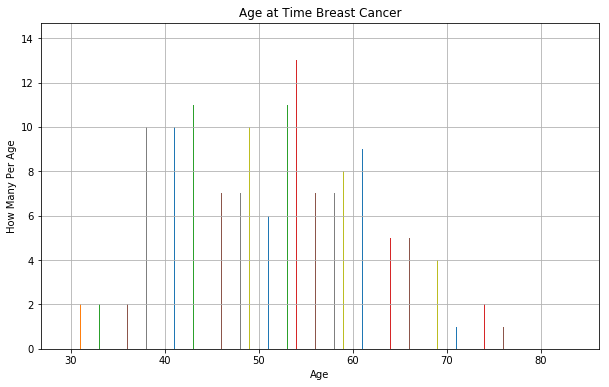

In [94]:
breast_cancer_data.groupby('Age').Age.hist(bins=20, alpha=1.0,figsize=(10,6))
plt.title('Age at Time Breast Cancer')
plt.ylabel('How Many Per Age')
plt.xlabel('Age')   
plt.show()

In [95]:
pd.crosstab(breast_cancer_data['Age'], breast_cancer_data['Survival_Status']) # This really helps to see the 
# survival rate in each age bracket. Honestly, it looks random. There isn't a pattern that will show if you
#will survive or not. 

Survival_Status,1,2
Age,,
30,3,0
31,2,0
33,2,0
34,5,2
35,2,0
36,2,0
37,6,0
38,9,1
39,5,1


In [97]:
time_bins = pd.cut(breast_cancer_data['Age'], 10)  
pd.crosstab(time_bins, breast_cancer_data['Survival_Status'])

Survival_Status,1,2
Age,,
"(29.947, 35.3]",14,2
"(35.3, 40.6]",25,2
"(40.6, 45.9]",31,15
"(45.9, 51.2]",37,16
"(51.2, 56.5]",37,18
"(56.5, 61.8]",32,9
"(61.8, 67.1]",29,12
"(67.1, 72.4]",14,4
"(72.4, 77.7]",6,1


In [98]:
time_bins = pd.cut(breast_cancer_data['Positive_Ax_Nodes'], 20)  
pd.crosstab(time_bins, breast_cancer_data['Survival_Status'])

Survival_Status,1,2
Positive_Ax_Nodes,,
"(-0.052, 2.6]",165,32
"(2.6, 5.2]",25,14
"(5.2, 7.8]",9,5
"(7.8, 10.4]",9,7
"(10.4, 13.0]",3,8
"(13.0, 15.6]",4,3
"(15.6, 18.2]",2,1
"(18.2, 20.8]",2,3
"(20.8, 23.4]",2,5


In [99]:
time_bins = pd.cut(breast_cancer_data['Age'], 20)  
pd.crosstab(time_bins, breast_cancer_data['Positive_Ax_Nodes'])

Positive_Ax_Nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(29.947, 32.65]",1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(32.65, 35.3]",4,1,0,0,0,0,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
"(35.3, 37.95]",5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(37.95, 40.6]",9,2,3,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
"(40.6, 43.25]",14,3,4,1,2,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
"(43.25, 45.9]",7,3,0,0,0,0,2,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
"(45.9, 48.55]",9,0,2,3,2,1,1,1,1,0,0,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
"(48.55, 51.2]",10,9,1,2,1,0,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(51.2, 53.85]",7,5,2,3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### I pulled up quite a bit of data! From what I can see, age has nothing to do with your survival status. A feature that had a positive relationship with survival were the Positive Axillary Nodes. When you first look at the data, it seems as though the more, the less there was a death instance, but that isn't true. Just by dividing my answers (165/32) I could tell the less, the better! </b>
### A negative relationship with survival seemed to link with age in my opinion. It isn't an old versus new though. It looks like middle aged women are more likely to die within 5 years. </b>
### When comparing the positive ax nodes with age, it once again shows that middle-aged range to have an increased number of the nodes, which in turn leads to a higher risk of death. 